In [6]:
!pip install wordcloud
!pip install fileupload
!pip install ipywidgets
!jupyter nbextension install --py --user fileupload
!jupyter nbextension enable --py fileupload

## Importing required libraries

In [8]:
import wordcloud
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import fileupload
import io
import sys

In [9]:
# This is the uploader widget

def upload():

    upload_widget = fileupload.FileUploadWidget()

    def cb(change):
        global file_contents
        decoded = io.StringIO(change['owner'].data.decode('utf-8'))
        filename = change['owner'].filename
        print('Uploaded `{}` ({:.2f} kB)'.format(
            filename, len(decoded.read()) / 2 **10))
        file_contents = decoded.getvalue()

    upload_widget.observe(cb, names='data')
    display(upload_widget)

upload()

FileUploadWidget(label='Browse', _dom_classes=('widget_item', 'btn-group'))

Uploaded `Bitcoin.txt` (1.49 kB)


In [10]:
def calculate_frequencies(file_contents):
    
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    uninteresting_words = ["the","for", "a", "to", "if", "is","not","on", "it", "of", "and", "or", "an", "as","in", "i", "me", "my", \
    "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
    "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
    "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
    "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just","than"]
    new_content = ""
    frequencies = {}
    for ch in file_contents:
        if ch not in punctuations:
            new_content += ch
    temp_file = new_content.split(" ")
    while "" in temp_file:
        temp_file.remove("")
    for word in temp_file:
        if word.lower() not in uninteresting_words:
            if word in frequencies:
                frequencies[word] +=1
            else:
                frequencies[word] = 1
    
    #wordcloud
    cloud = wordcloud.WordCloud()
    cloud.generate_from_frequencies(frequencies)
    return cloud.to_array()

## Displaying the Word Cloud 

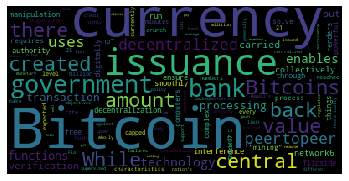

In [11]:
myimage = calculate_frequencies(file_contents)
plt.imshow(myimage, interpolation = 'nearest')
plt.axis('off')
plt.show()